# Data Wrangling: Join, Combine, and Reshape

## Description

### GitHub URL

[GitHub連結](https://github.com/wesm/pydata-book)

### Required Dataset

[macrodata.csv](https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv)

## Required Packages

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

## 8.1 Hierarchical Indexing

In [2]:
data = pd.Series(
    np.random.randn(9),
    index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],[1, 2, 3, 1, 3, 1, 2, 2, 3]]
)
data

a  1   -0.572067
   2   -1.108236
   3    0.609695
b  1    0.543564
   3    0.249654
c  1   -1.258298
   2   -0.090537
d  2   -0.673775
   3   -0.190457
dtype: float64

In [3]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [4]:
data['b']

1    0.543564
3    0.249654
dtype: float64

In [5]:
data['b':'c']

b  1    0.543564
   3    0.249654
c  1   -1.258298
   2   -0.090537
dtype: float64

In [6]:
data.loc[['b', 'c']]

b  1    0.543564
   3    0.249654
c  1   -1.258298
   2   -0.090537
dtype: float64

In [7]:
data.loc[:, 2]

a   -1.108236
c   -0.090537
d   -0.673775
dtype: float64

In [8]:
data.unstack()

,1,2,3
a,-0.572067,-1.108236,0.609695
b,0.543564,NaN,0.249654
c,-1.258298,-0.090537,NaN
d,NaN,-0.673775,-0.190457


In [9]:
data.unstack().stack()

a  1   -0.572067
   2   -1.108236
   3    0.609695
b  1    0.543564
   3    0.249654
c  1   -1.258298
   2   -0.090537
d  2   -0.673775
   3   -0.190457
dtype: float64

In [10]:
frame = pd.DataFrame(
    np.arange(12).reshape(4, 3),
    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
    columns=[['Ohio', 'Ohio', 'Colorado'],['Green', 'Red', 'Green']]
)
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [11]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [12]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [13]:
pd.MultiIndex.from_arrays(
    [['Ohio', 'Ohio', 'Colorado'],['Green', 'Red', 'Green']],
    names=['state', 'color']
)

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

### Reordering and Sorting Levels

In [14]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [15]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [16]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Summary Statistics by Level

In [17]:
frame.groupby(level='key2').sum()

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [18]:
frame.groupby(level='color', axis=1).sum()

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### Indexing with a DataFrame's columns

In [19]:
frame = pd.DataFrame({
    'a': range(7),
    'b': range(7, 0, -1),
    'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
    'd': [0, 1, 2, 0, 1, 2, 3],
})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [20]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [21]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [22]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 8.2 Combining and Merging Datasets

**pandas.merge**: 基於一個或二個以上的關鍵詞連結資料框的行。預設值為inner join。  
**pandas.concat**:  
**combine_first**:  

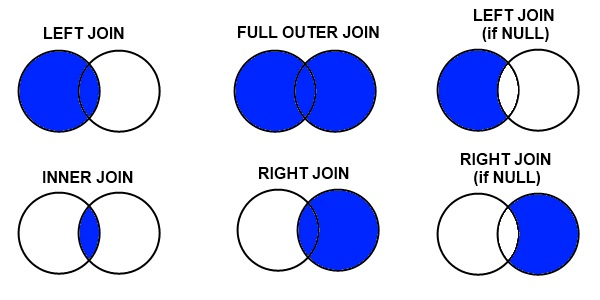

In [23]:
Image("src/images/ven-diagram.jpg")

### Database-Style DataFrame Joins

In [24]:
df1 = pd.DataFrame({
    'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
    'data1': range(7),
})
# 資料框1的內容
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [25]:
df2 = pd.DataFrame({
    'key': ['a', 'b', 'd'],
    'data2': range(3),
})
#資料框2的內容
df2

,key,data2
0,a,0
1,b,1
2,d,2


#### Many to one

In [26]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [27]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [28]:
df3 = pd.DataFrame({
    'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
    'data1': range(7),
})
# 資料框3的內容
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [29]:
df4 = pd.DataFrame({
    'rkey': ['a', 'b', 'd'],
    'data2': range(3),
})
# 資料框4的內容
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [30]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [31]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


#### Many to Many

In [32]:
df1 = pd.DataFrame({
    'key': ['b', 'b', 'a', 'c', 'a', 'b'],
    'data1': range(6),
})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [33]:
df2 = pd.DataFrame({
    'key': ['a', 'b', 'a', 'b', 'd'],
    'data2': range(5),
})
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [34]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [35]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [36]:
left = pd.DataFrame({
    'key1': ['foo', 'foo', 'bar'],
    'key2': ['one', 'two', 'one'],
    'lval': [1, 2, 3],
})
# 資料框left的內容
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [37]:
right = pd.DataFrame({
    'key1': ['foo', 'foo', 'bar', 'bar'],
    'key2': ['one', 'one', 'one', 'two'],
    'rval': [4, 5, 6, 7],
})
# 資料框right的內容
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [38]:
pd.merge(left, right, on=['key1', 'key2'], how="outer")

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [39]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [40]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


| Argument | 說明 |
| - | - |
| left | 左邊的資料框 |
| right | 右邊的資料框 |
| how | 你可以選擇合併方法。（inner, outer, left, right）預設值為inner。 |
| on | 兩個資料框共同的關鍵詞設為合併時的基準 |
| left_on | 左邊資料框的關鍵詞（column名稱） |
| right_on | 右邊資料框的關鍵詞（column名稱） |
| left_index | 把標籤設為左邊資料框的關鍵詞 |
| right_index | 把標籤設為右邊資料框的關鍵詞 |
| sort | 排序合併後的資料框。預設值為True。 |
| suffixes | column的結尾名稱 |
| copy | 預設值為True。 |

### Merging on Index

In [41]:
left1 = pd.DataFrame({
    'key': ['a', 'b', 'a', 'a', 'b', 'c'],
    'value': range(6),
})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [42]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
right1

,group_val
a,3.5
b,7.0


In [43]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [44]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [45]:
lefth = pd.DataFrame({
    'key1': ['Onio', 'Onio', 'Ohio', 'Nevada', 'Nevada'],
    'key2': [2000, 2001, 2002, 2001, 2002],
    'data': np.arange(5.),
})
lefth

,key1,key2,data
0,Onio,2000,0.0
1,Onio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [46]:
righth = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'], [2001, 2000, 2000, 2000, 2001, 2002]],
    columns=['event1', 'event2']
)
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [47]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [48]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Onio,2000,0.0,NaN,NaN
1,Onio,2001,1.0,NaN,NaN
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0
4,Ohio,2000,NaN,4.0,5.0
4,Ohio,2000,NaN,6.0,7.0
4,Ohio,2001,NaN,8.0,9.0


In [49]:
left2 = pd.DataFrame(
    [[1., 2.], [3., 4.], [5., 6.]],
    index=['a', 'c', 'e'],
    columns=['Ohio', 'Nevada']
)
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [50]:
right2 = pd.DataFrame(
    [[7., 8.], [9., 10.], [11., 12.], [13, 14]],
    index=['b', 'c', 'd', 'e'],
    columns=['Missouri', 'Alabama']
)
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [51]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [52]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [53]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [54]:
another = pd.DataFrame(
    [[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
    index=['a', 'c', 'e', 'f'],
    columns=['New York', 'Oregon']
)
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [55]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [56]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating Along an Axis

In [57]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [59]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [60]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [61]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [62]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [63]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [64]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


In [65]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [66]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [67]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [68]:
df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2),
    index=['a', 'b', 'c'],
    columns=['one', 'two'],
)
df1

,one,two
a,0,1
b,2,3
c,4,5


In [69]:
df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2, 2),
    index=['a', 'c'],
    columns=['three', 'four'],
)
df2

,three,four
a,5,6
c,7,8


In [70]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [71]:
pd.concat(
    {
        'level1': df1,
        'level2': df2,
    },
    axis=1
)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [72]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [73]:
df1 = pd.DataFrame(
    np.random.randn(3, 4),
    columns=['a', 'b', 'c', 'd'],
)
df1

,a,b,c,d
0,-0.445547,-1.757651,0.763451,-0.927567
1,0.823641,0.331322,1.474226,1.123011
2,-0.399483,0.571404,-0.552551,-0.672398


In [74]:
df2 = pd.DataFrame(
    np.random.randn(2, 3),
    columns=['b', 'd', 'e'],
)
df2

,b,d,e
0,1.065666,-0.323013,0.023367
1,0.873190,0.276207,-0.120664


In [75]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d,e
0,-0.445547,-1.757651,0.763451,-0.927567,NaN
1,0.823641,0.331322,1.474226,1.123011,NaN
2,-0.399483,0.571404,-0.552551,-0.672398,NaN
3,NaN,1.065666,NaN,-0.323013,0.023367
4,NaN,0.873190,NaN,0.276207,-0.120664


### Combining Data with Overlap

In [76]:
a = pd.Series(
    [np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
    index=['f', 'e', 'd', 'c', 'b', 'a']
)
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [77]:
b = pd.Series(
    [0., np.nan, 2., np.nan, np.nan, 5.],
    index=['a', 'b', 'c', 'd', 'e', 'f']
)
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [78]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [79]:
b.combine_first(a)

a    0.0
b    4.5
c    2.0
d    0.0
e    2.5
f    5.0
dtype: float64

In [80]:
df1 = pd.DataFrame({
    'a': [1., np.nan, 5., np.nan],
    'b': [np.nan, 2., np.nan, 6],
    'c': range(2, 18, 4),
})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [81]:
df2 = pd.DataFrame({
    'a': [5., 4., np.nan, 3., 7.],
    'b': [np.nan, 3., 4., 6., 8.],
})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [82]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 8.3 Reshaping and Pivoting

### Reshaping with Hierarchical Indexing

In [83]:
data = pd.DataFrame(
    np.arange(6).reshape((2, 3)),
    index=pd.Index(['Ohio', 'Colorado'], name='state'),
    columns=pd.Index(['one', 'two', 'three'], name='number')
)
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [84]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [85]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [86]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [87]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [88]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [89]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [90]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [91]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [92]:
df = pd.DataFrame(
    {
        'left': result,
        'right': result + 5,
    },
    columns=pd.Index(['left', 'right'], name='side')
)
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [93]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [94]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting "Long" to "Wide" Format

In [95]:
data = pd.read_csv('src/csv/macrodata.csv')

In [96]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [97]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [98]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [99]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [100]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,1.107551
1,1959-03-31 23:59:59.999999999,infl,0.000,0.357927
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.356968
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,1.023055
4,1959-06-30 23:59:59.999999999,infl,2.340,1.187302
5,1959-06-30 23:59:59.999999999,unemp,5.100,0.412610
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-0.306165
7,1959-09-30 23:59:59.999999999,infl,2.740,-0.390352
8,1959-09-30 23:59:59.999999999,unemp,5.300,-0.718588
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,1.912760


In [101]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.357927  1.107551   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  1.187302  1.023055   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.390352 -0.306165   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.170667  1.912760   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -1.497503  0.572817   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.356968  
1959-06-30 23:59:59.999999999  0.412610  
1959-09-30 23:59:59.999999999 -0.718588  
1959-12-31 23:59:59.999999999  0.956734  
1960-03-31 23:59:59.999999999  0.736804

In [102]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [103]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.357927  1.107551   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  1.187302  1.023055   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.390352 -0.306165   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.170667  1.912760   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -1.497503  0.572817   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2 -0.386498  0.038373   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6  1.618001  0.681950   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.356968  
1959-06-30 23:59:59.999999999  0.412610  
1959-09-30 23:59:59.999999999 -0.718588  
1959-12-31 23:59:59.999999999  0.956734  
1960-03-31 23:59:59.999999999  0.736804  
1960-06-30 23:59:59.999999999  1.063578  
1960-09-30 23:59:59.999999999 -0.086806

### Pivoting "Wide" to "Long" Format

In [104]:
df = pd.DataFrame({
    'key': ['foo', 'bar', 'baz'],
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9],
})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [105]:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [106]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [107]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [108]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [109]:
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [110]:
pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
